In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from trader import Trader
from datamodel import OrderDepth, UserId, TradingState, Order, Listing, Trade
from utils import get_tradehistory, get_mytrades, get_pnl
from exchange import Exchange

Process log file to extract price data

In [4]:
infile = r"data/trade9.log"

fp = open(infile)
start = False
start_signal = "Activities log"
end_signal = "Trade History"
outfile = "prices_day_5.txt"

with open(outfile, "w") as f:

    for line in fp:

        if not start:
            if start_signal in line:
                start = True

        elif start:
            if end_signal in line:
                break
            
            f.write(line)
             
f.close()
fp.close()


FileNotFoundError: [Errno 2] No such file or directory: 'data/trade9.log'

Check calculated PnL

In [2]:
price = pd.read_csv("data/prices_day_5.csv", sep=";")
infile = r"data/trades_day_5.log"
hist = get_tradehistory(infile)
mytrades = get_mytrades(hist).reset_index(drop=True)
mp = price.loc[price["product"]=="AMETHYSTS"]

In [3]:
pnls = get_pnl(mytrades, list(mp["timestamp"]), mp)
pnl_true = mp["profit_and_loss"]

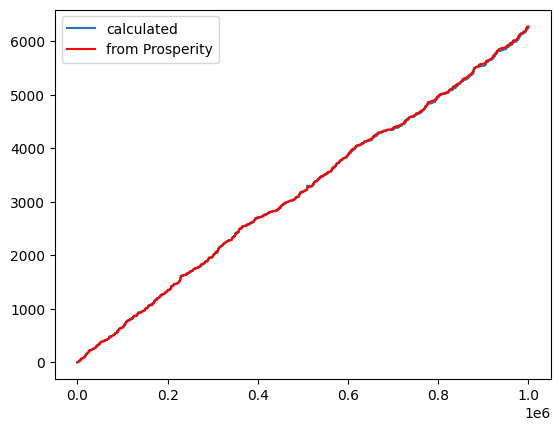

In [4]:
plt.plot(mp["timestamp"], pnls, label="calculated")
plt.plot(mp["timestamp"], pnl_true, color='r', label="from Prosperity")
plt.legend()
plt.show()

Exchange: Example with day 4 prices (3 iterations)

In [5]:
mp = pd.read_csv("data/prices_day_4.csv", sep=";")
timestamps = [900, 1000, 1100]
ex = Exchange()
trader = Trader()
state = ex.state_start

# a sample of "result" returned by Trader.run()
algo_order_t1 = {"AMETHYSTS": [Order("AMETHYSTS", 10001, 3), Order("AMETHYSTS", 9995, -3)]}
algo_order_t2 = {"AMETHYSTS": [Order("AMETHYSTS", 10003, 2), Order("AMETHYSTS", 9995, -5)]}
algo_order_t3 = {"AMETHYSTS": []}
orders = [algo_order_t1, algo_order_t2, algo_order_t3]

pnls = ex.iterate(timestamps, mp, trader, 
                  extra_bot_orders="probabilistic", p=1., q=.7, 
                  verbose=2, testing=(True, orders, timestamps))
print("PnL: ", pnls)


-----------------------------------------------
timestamp:  900
position:  {'STARFRUIT': 0, 'AMETHYSTS': 0, 'ORCHIDS': 0, 'CHOCOLATE': 0, 'STRAWBERRIES': 0, 'ROSES': 0, 'GIFT_BASKET': 0, 'COCONUT': 0, 'COCONUT_COUPON': 0}
own trades:  {'STARFRUIT': [], 'AMETHYSTS': [], 'ORCHIDS': [], 'CHOCOLATE': [], 'STRAWBERRIES': [], 'ROSES': [], 'GIFT_BASKET': [], 'COCONUT': [], 'COCONUT_COUPON': []}
9999.0
-----------------------------------------------
timestamp:  1000
position:  {'STARFRUIT': 0, 'AMETHYSTS': -1, 'ORCHIDS': 0, 'CHOCOLATE': 0, 'STRAWBERRIES': 0, 'ROSES': 0, 'GIFT_BASKET': 0, 'COCONUT': 0, 'COCONUT_COUPON': 0}
own trades:  {'STARFRUIT': [], 'AMETHYSTS': [(AMETHYSTS, SUBMISSION << , 10001, 2, 900), (AMETHYSTS,  << SUBMISSION, 9996, 1, 900), (AMETHYSTS,  << SUBMISSION, 9995.0, 2, 900)], 'ORCHIDS': [], 'CHOCOLATE': [], 'STRAWBERRIES': [], 'ROSES': [], 'GIFT_BASKET': [], 'COCONUT': [], 'COCONUT_COUPON': []}
9998.0
-----------------------------------------------
timestamp:  1100
positio

Exchange: Example with day 5 prices (4 iterations)

In [6]:
mp = pd.read_csv("data/prices_day_5.csv", sep=";")
timestamps = [0, 100, 200, 300]
ex = Exchange()
trader = Trader()
state = ex.state_start

# a sample of "result" returned by Trader.run()
algo_order_t1 = {"AMETHYSTS": [Order("AMETHYSTS", 10005, 2), Order("AMETHYSTS", 9995, -1)]}
algo_order_t2 = {"AMETHYSTS": [Order("AMETHYSTS", 9999, 1)]}
algo_order_t3 = {"AMETHYSTS": []}
orders = [algo_order_t1, algo_order_t2, algo_order_t3, algo_order_t3]

pnls = ex.iterate(timestamps, mp, trader, 
                  extra_bot_orders="always", p=1., q=1., 
                  verbose=2, testing=(True, orders, timestamps))
print("PnL: ", pnls)

-----------------------------------------------
timestamp:  0
position:  {'STARFRUIT': 0, 'AMETHYSTS': 0, 'ORCHIDS': 0, 'CHOCOLATE': 0, 'STRAWBERRIES': 0, 'ROSES': 0, 'GIFT_BASKET': 0, 'COCONUT': 0, 'COCONUT_COUPON': 0}
own trades:  {'STARFRUIT': [], 'AMETHYSTS': [], 'ORCHIDS': [], 'CHOCOLATE': [], 'STRAWBERRIES': [], 'ROSES': [], 'GIFT_BASKET': [], 'COCONUT': [], 'COCONUT_COUPON': []}
9999.0
-----------------------------------------------
timestamp:  100
position:  {'STARFRUIT': 0, 'AMETHYSTS': 1, 'ORCHIDS': 0, 'CHOCOLATE': 0, 'STRAWBERRIES': 0, 'ROSES': 0, 'GIFT_BASKET': 0, 'COCONUT': 0, 'COCONUT_COUPON': 0}
own trades:  {'STARFRUIT': [], 'AMETHYSTS': [(AMETHYSTS, SUBMISSION << , 10004, 2, 0), (AMETHYSTS,  << SUBMISSION, 9998, 1, 0)], 'ORCHIDS': [], 'CHOCOLATE': [], 'STRAWBERRIES': [], 'ROSES': [], 'GIFT_BASKET': [], 'COCONUT': [], 'COCONUT_COUPON': []}
10000.0
-----------------------------------------------
timestamp:  200
position:  {'STARFRUIT': 0, 'AMETHYSTS': 2, 'ORCHIDS': 0, 'C

Same example, but with 2 products

In [7]:
mp = pd.read_csv("data/prices_day_5.csv", sep=";")
timestamps = [0, 100, 200, 300]
ex = Exchange()
trader = Trader()
state = ex.state_start

# a sample of "result" returned by Trader.run()
algo_order_t1 = {"AMETHYSTS": [Order("AMETHYSTS", 10005, 2), Order("AMETHYSTS", 9995, -1)],
                 "STARFRUIT": [Order("STARFRUIT", 4870, -2), Order("STARFRUIT", 4865, 2)]}
algo_order_t2 = {"AMETHYSTS": [Order("AMETHYSTS", 9999, 1)],
                 "STARFRUIT": [Order("STARFRUIT", 4875, 1)]}
algo_order_t3 = {"AMETHYSTS": [],
                 "STARFRUIT": []}
orders = [algo_order_t1, algo_order_t2, algo_order_t3, algo_order_t3]

pnls = ex.iterate(timestamps, mp, trader, 
                  extra_bot_orders="always", p=1., q=1., 
                  verbose=2, testing=(True, orders, timestamps))
print("PnL: ", pnls)

-----------------------------------------------
timestamp:  0
position:  {'STARFRUIT': 0, 'AMETHYSTS': 0, 'ORCHIDS': 0, 'CHOCOLATE': 0, 'STRAWBERRIES': 0, 'ROSES': 0, 'GIFT_BASKET': 0, 'COCONUT': 0, 'COCONUT_COUPON': 0}
own trades:  {'STARFRUIT': [], 'AMETHYSTS': [], 'ORCHIDS': [], 'CHOCOLATE': [], 'STRAWBERRIES': [], 'ROSES': [], 'GIFT_BASKET': [], 'COCONUT': [], 'COCONUT_COUPON': []}
4872.5
9999.0
-----------------------------------------------
timestamp:  100
position:  {'STARFRUIT': 0, 'AMETHYSTS': 1, 'ORCHIDS': 0, 'CHOCOLATE': 0, 'STRAWBERRIES': 0, 'ROSES': 0, 'GIFT_BASKET': 0, 'COCONUT': 0, 'COCONUT_COUPON': 0}
own trades:  {'STARFRUIT': [(STARFRUIT, SUBMISSION << , 4865, 2, 0), (STARFRUIT,  << SUBMISSION, 4871, 2, 0)], 'AMETHYSTS': [(AMETHYSTS, SUBMISSION << , 10004, 2, 0), (AMETHYSTS,  << SUBMISSION, 9998, 1, 0)], 'ORCHIDS': [], 'CHOCOLATE': [], 'STRAWBERRIES': [], 'ROSES': [], 'GIFT_BASKET': [], 'COCONUT': [], 'COCONUT_COUPON': []}
4875.0
10000.0
------------------------------

check different extra bot order parameter

In [7]:
mp = pd.read_csv("data/prices_day_5.csv", sep=";")
timestamps = list(mp["timestamp"].unique())
ex = Exchange()
trader = Trader()
state = ex.state_start

pnls = ex.iterate(timestamps, mp, trader, 
                extra_bot_orders="always", p=0.5, q=1., 
                verbose=0)

pnls2 = ex.iterate(timestamps, mp, trader, 
                extra_bot_orders="never", p=0.5, q=1., 
                verbose=0)

pnls3 = ex.iterate(timestamps, mp, trader, 
                extra_bot_orders="probabilistic", p=0.5, q=1., 
                verbose=0)

Position limit exceeded; cancelling all SELL orders at time 6000
Position limit exceeded; cancelling all SELL orders at time 8400
Position limit exceeded; cancelling all SELL orders at time 8600
Position limit exceeded; cancelling all SELL orders at time 13500
Position limit exceeded; cancelling all BUY orders at time 19100
Position limit exceeded; cancelling all SELL orders at time 24600
Position limit exceeded; cancelling all BUY orders at time 29200
Position limit exceeded; cancelling all BUY orders at time 31800
Position limit exceeded; cancelling all BUY orders at time 33000
Position limit exceeded; cancelling all BUY orders at time 40300
Position limit exceeded; cancelling all BUY orders at time 40400
Position limit exceeded; cancelling all SELL orders at time 41700
Position limit exceeded; cancelling all SELL orders at time 42500
Position limit exceeded; cancelling all SELL orders at time 44900
Position limit exceeded; cancelling all SELL orders at time 49500
Position limit exce

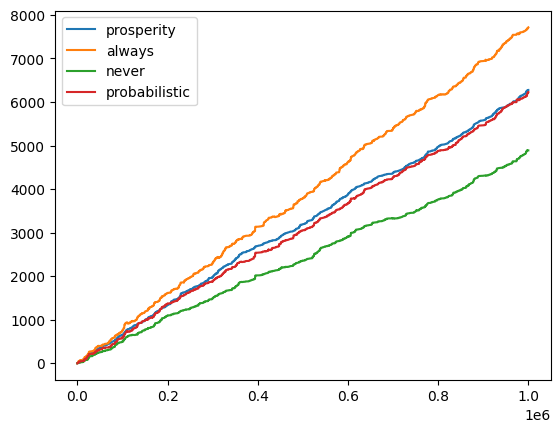

In [10]:
plt.plot(timestamps, mp.loc[mp["product"]=="AMETHYSTS"]["profit_and_loss"], label="prosperity")
plt.plot(timestamps, pnls["AMETHYSTS"], label="always")
plt.plot(timestamps, pnls2["AMETHYSTS"], label="never")
plt.plot(timestamps, pnls3["AMETHYSTS"], label="probabilistic")
plt.legend()
plt.show()